In [61]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

In [62]:
df = pd.read_csv('vectorized_data.zip')

In [63]:
df.shape

(176141, 53)

In [64]:
df['Assessment reports Score'].value_counts()

3    91941
4    61151
2    21104
1     1451
5      494
Name: Assessment reports Score, dtype: int64

## Random sampling for grade class imbalance

In [65]:
sample_len = df[df['Assessment reports Score'] == 2].shape[0]

sample_3 = df[df['Assessment reports Score'] == 3].sample(n= sample_len)
sample_4 = df[df['Assessment reports Score'] == 4].sample(n= sample_len)

#concatenate the dataframes
df = pd.concat([df[df['Assessment reports Score'] == 2], sample_3, sample_4], axis=0)

In [66]:
df.columns

Index(['Polls ID', 'Poll Responses Response', 'Assessment reports Hashtag',
       'Assessment reports Score', 'time_stamp', 'tokenized_responses',
       'stemmed_responses', 'clean_responses', 'string', 'LOs/ HCs', 'College',
       'Course', 'flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog',
       'smog_index', 'automated_readability_index', 'coleman_liau_index',
       'dale_chall_readability_score', 'linsear_write_formula',
       'lex_data_prep', 'hdd', 'Summer', 'Dugast', 'words_count',
       'unique_words', 'ttr', 'rttr', 'cttr', 'mtld', 'herdan', 'maas', 'vec',
       'vec_1', 'vec_2', 'vec_3', 'vec_4', 'vec_5', 'vec_6', 'vec_7', 'vec_8',
       'vec_9', 'vec_10', 'vec_11', 'vec_12', 'vec_13', 'vec_14', 'vec_15',
       'vec_16', 'vec_17', 'vec_18', 'vec_19', 'vec_20'],
      dtype='object')

In [67]:
# X exclude categorical data
X = df[['time_stamp','flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog',
       'smog_index', 'automated_readability_index', 'coleman_liau_index',
       'dale_chall_readability_score', 'linsear_write_formula', 'hdd', 'Summer', 'Dugast', 'words_count',
       'unique_words', 'ttr', 'rttr', 'cttr', 'mtld', 'herdan', 'maas', 
       'vec_1', 'vec_2', 'vec_3', 'vec_4', 'vec_5', 'vec_6', 'vec_7', 'vec_8',
       'vec_9', 'vec_10', 'vec_11', 'vec_12', 'vec_13', 'vec_14', 'vec_15',
       'vec_16', 'vec_17', 'vec_18', 'vec_19', 'vec_20']]
y = df['Assessment reports Score']

In [68]:
len(X.columns)

40

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [70]:
classifier = xgb.XGBClassifier(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [71]:
classifier.fit(X_train, y_train)

/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:26:49] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [111]:
feature_tables = pd.DataFrame(classifier.feature_importances_.reshape(1, -1), columns=X.columns).T
feature_tables.sort_values(by=0, ascending=False)

,0
unique_words,0.242862
automated_readability_index,0.149708
linsear_write_formula,0.088522
rttr,0.067451
words_count,0.054203
time_stamp,0.029762
flesch_kincaid_grade,0.025231
coleman_liau_index,0.019503
mtld,0.017371
vec_10,0.015709


In [73]:
y_pred = classifier.predict(X_test)

In [74]:
mean_squared_error(y_test, y_pred)

0.9639246904220369

In [75]:
import collections, numpy
counter = collections.Counter(y_pred)
counter

Counter({2: 5290, 4: 6155, 3: 4383})

In [76]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 47.56%


In [77]:
train_score = classification_report(y_test, y_pred)
print(train_score)

              precision    recall  f1-score   support

           2       0.52      0.52      0.52      5283
           3       0.42      0.35      0.38      5262
           4       0.48      0.56      0.51      5283

    accuracy                           0.48     15828
   macro avg       0.47      0.48      0.47     15828
weighted avg       0.47      0.48      0.47     15828



## Cross validation

In [78]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(classifier, X, y, cv=kf)

/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:26:57] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:27:06] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:27:14] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:27:23] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:27:31] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [79]:
for fold, score in enumerate(scores):
    print(f'Fold {fold+1}: {score:.3f}')

# Print the overall accuracy
print(f'Overall Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

Fold 1: 0.470
Fold 2: 0.476
Fold 3: 0.476
Fold 4: 0.477
Fold 5: 0.480
Overall Accuracy: 0.476 (+/- 0.006)


## PCA

### Apply feature scaling 

In [80]:
# copying the data
X_copy = X.copy()
columns = X_copy.columns

In [81]:
# Apply feature scaling 
scaler = StandardScaler()
X_copy = scaler.fit_transform(X_copy)
X_copy = pd.DataFrame(X_copy, columns= columns)
X_copy.head()

,time_stamp,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,hdd,...,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
0,-1.589815,1.677097,-1.714416,-2.086548,0.0,-0.846715,0.995425,0.103417,-1.712289,0.692478,...,1.448789,0.982150,-0.087096,0.270532,2.481581,0.384191,1.025294,0.596762,0.708367,-0.737624
1,-1.589815,0.796528,-1.255894,-1.754619,0.0,-0.940095,0.778103,-0.285746,-1.453410,-0.143757,...,1.187565,0.950143,1.273151,0.072444,1.360621,-0.708024,1.061672,2.132166,1.555455,1.231185
2,-1.589815,1.606319,-2.033387,-1.706916,0.0,-1.749382,-0.069454,-0.604152,-1.777008,0.623173,...,1.005200,-0.317280,-0.032436,-0.674428,0.614716,-1.734916,-0.015063,-0.421991,1.550511,0.046356
3,-1.589815,2.275593,-2.192873,-1.947416,0.0,-1.733819,-0.789722,-1.871879,-1.647569,0.766531,...,0.481939,0.343605,-0.498391,-1.386685,-0.621980,-2.130901,0.528675,-1.643444,0.657064,-0.620357
4,-1.589594,1.095776,-0.857180,-0.985417,0.0,-0.535451,-0.246416,0.315687,-0.741492,0.244827,...,0.401062,0.001633,-0.980214,-0.600105,0.611563,-0.493866,1.008731,1.901978,0.621706,-0.755543


Text(0.5, 1.0, 'PCA cumulative explained variance')

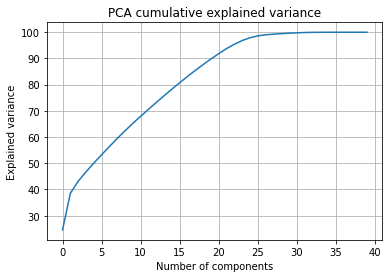

In [82]:
import numpy as np
from sklearn.decomposition import PCA
# Use 100 components to see explained variance 
pca_40 = PCA(n_components = 40)
pca_40.fit(X_copy)

plt.grid()
plt.plot(np.cumsum(pca_40.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('PCA cumulative explained variance')

In [83]:
#Explained variance ratio with numbers of components

import pandas as pd
explained_var = np.cumsum(pca_40.explained_variance_ratio_ * 100).reshape(-1, 1)
num_comps = [i+1 for i in range(40)]
explained_var
explained_var_df = pd.DataFrame(explained_var,index=num_comps, columns = ['Explained Variance Ratio'])
explained_var_df

,Explained Variance Ratio
1,24.560269
2,38.530736
3,43.135666
4,46.688188
5,50.037746
6,53.234208
7,56.348001
8,59.455990
9,62.372641
10,65.201431


In [84]:
def pca_results(full_dataset, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''
    # Dimension indexing
    
    #use the number of componenets to create dimensions 
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # use PCA components to create a dataframe: columns = variables, rows = component values
    components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.columns)
    components.index = dimensions#change index to dimensions 
    
    # PCA explained variance 
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    #make explained variance into a column format
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    return pd.concat([variance_ratios, components], axis = 1) #put explained variance and component df together 


def pca_plot(pca_results_df , nth_component):
    
    explain_variance = pca_results_df['Explained Variance'][:nth_component]
    accu_explain_variance = np.round(explain_variance.sum(),4)

    
    sort_comp = pca_results_df.iloc[nth_component-1, 1:].sort_values()
    head = sort_comp[:5]  #largest five variables in a component
    tail = sort_comp[-5:] #smallest five variables in a component
    components = pd.concat([head, tail])
    
    # Plot the components 
    components.plot(kind='bar', title='Component ' + str(nth_component), color = 'c')
    ax = plt.gca()
    ax.grid(linewidth='0.5', alpha=0.5)

    plt.show()
    print('Accumulative explained varaince for Component',nth_component,'is',accu_explain_variance)
    return components

In [85]:
pca_results_40 = pca_results(X, pca_40)
pca_results_40

,Explained Variance,time_stamp,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,...,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
Dimension 1,0.2456,-0.0261,0.2275,-0.2414,-0.2384,-0.0000,-0.2504,-0.1752,-0.1949,-0.2259,...,0.0272,-0.0326,0.0071,0.0330,-0.0032,-0.0387,0.0370,0.0442,-0.0947,0.0214
Dimension 2,0.1397,0.1066,-0.1848,0.2680,0.2590,-0.0000,0.2500,-0.0069,-0.0881,0.2852,...,-0.0186,-0.0185,-0.0144,0.0136,-0.0059,0.0220,-0.0237,0.0049,-0.0154,0.0106
Dimension 3,0.0460,-0.0410,-0.3209,0.0842,0.0103,0.0000,0.0539,0.4562,0.3345,-0.0156,...,-0.1122,0.3458,0.0102,0.1363,0.0550,0.0584,-0.1555,-0.0951,-0.0089,-0.2068
Dimension 4,0.0355,0.0019,-0.0300,-0.0000,-0.0055,-0.0000,0.0087,0.0826,-0.0160,-0.0018,...,0.1834,0.1756,-0.3719,-0.2718,0.0359,-0.2333,0.0621,-0.1423,0.2310,-0.0500
Dimension 5,0.0335,0.0322,0.0067,-0.0136,-0.0177,0.0000,-0.0079,0.0159,0.0426,-0.0210,...,-0.0846,0.1650,-0.0166,-0.0851,0.0033,0.3389,-0.2818,0.0740,0.2973,-0.0746
Dimension 6,0.0320,0.3983,-0.0340,0.0087,-0.0050,0.0000,-0.0240,-0.0277,0.1031,-0.0135,...,-0.1203,-0.1132,0.1030,0.1357,0.0512,0.3986,-0.0362,0.4483,0.1317,-0.0635
Dimension 7,0.0311,0.0400,0.0263,-0.0251,-0.0322,-0.0000,0.0037,0.0508,0.0159,-0.0284,...,-0.0224,0.2263,0.1925,-0.1953,0.2961,0.0175,0.2054,-0.2452,0.1551,0.1736
Dimension 8,0.0311,-0.0770,0.0112,-0.0235,-0.0203,0.0000,-0.0022,0.0616,-0.1164,-0.0174,...,0.3266,-0.0803,-0.2403,-0.0463,0.6343,0.0104,-0.0455,0.1717,0.3308,-0.0033
Dimension 9,0.0292,-0.1822,0.0070,-0.0068,-0.0160,-0.0000,0.0002,0.0134,-0.0016,-0.0071,...,-0.2151,0.2195,0.1704,-0.1632,0.0808,-0.1628,0.0179,0.3086,0.0845,0.3323
Dimension 10,0.0283,0.1348,0.0633,0.0078,0.0482,-0.0000,-0.0149,-0.1966,0.0479,0.0412,...,-0.3001,-0.2582,-0.0366,0.0938,0.4088,-0.2776,-0.1805,-0.0787,-0.0637,-0.4991


In [86]:
pca_results_40.iloc[0]

Explained Variance              0.2456
time_stamp                     -0.0261
flesch_reading_ease             0.2275
flesch_kincaid_grade           -0.2414
gunning_fog                    -0.2384
smog_index                     -0.0000
automated_readability_index    -0.2504
coleman_liau_index             -0.1752
dale_chall_readability_score   -0.1949
linsear_write_formula          -0.2259
hdd                            -0.2630
Summer                         -0.2245
Dugast                         -0.1517
words_count                    -0.1937
unique_words                   -0.2738
ttr                            -0.1319
rttr                           -0.3055
cttr                           -0.3055
mtld                           -0.2388
herdan                         -0.2009
maas                            0.2402
vec_1                           0.0471
vec_2                           0.0009
vec_3                           0.0237
vec_4                          -0.0280
vec_5                    

In [87]:
#Reapply PCA with 25 components
pca_25 = PCA(25)
pca_features_25 = pca_25.fit_transform(X_copy)

In [88]:
print(pca_features_25.shape)
print(np.cumsum(pca_25.explained_variance_ratio_))

(63312, 25)
[0.24560269 0.38530736 0.43135666 0.46688188 0.50037746 0.53234208
 0.56348001 0.5945599  0.62372641 0.65201431 0.67904083 0.70564286
 0.73174829 0.75744221 0.78263812 0.80701861 0.83098093 0.85411724
 0.87640235 0.89758021 0.91804994 0.93748621 0.95384563 0.96812946
 0.97887256]


Text(0.5, 1.0, 'PCA cumulative explained variance')

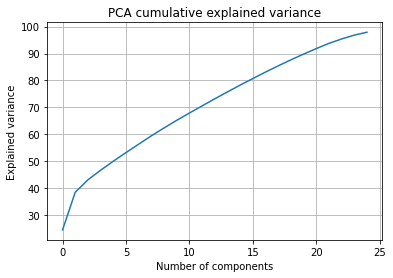

In [89]:
plt.grid()
plt.plot(np.cumsum(pca_25.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('PCA cumulative explained variance')


In [90]:
pca_features_25

array([[ 0.30211502, -5.27176323,  0.04751022, ..., -0.15859731,
         0.05937348, -0.30696572],
       [ 3.16259199, -2.63281821,  0.96603889, ..., -0.84092643,
         0.22259395,  0.01476538],
       [ 1.87565   , -5.40193658, -0.10520949, ...,  0.37221706,
        -0.19963003,  0.04278375],
       ...,
       [-0.08161367, -1.75260815,  1.4989402 , ...,  0.58157419,
        -0.85898807,  0.60538072],
       [-1.14422497,  0.91482355, -1.57332266, ..., -0.4907372 ,
         0.44269728,  0.38964236],
       [ 3.5636405 , -0.70965469,  1.53138925, ...,  0.23613272,
        -0.44198299, -0.82639403]])

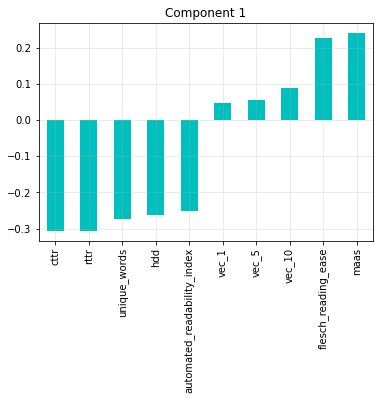

Accumulative explained varaince for Component 1 is 0.2456


cttr                          -0.3055
rttr                          -0.3055
unique_words                  -0.2738
hdd                           -0.2630
automated_readability_index   -0.2504
vec_1                          0.0471
vec_5                          0.0549
vec_10                         0.0888
flesch_reading_ease            0.2275
maas                           0.2402
Name: Dimension 1, dtype: float64

In [91]:
pca_results_25 = pca_results(X, pca_25)
pca_results_25
pca_plot(pca_results_25, 1)

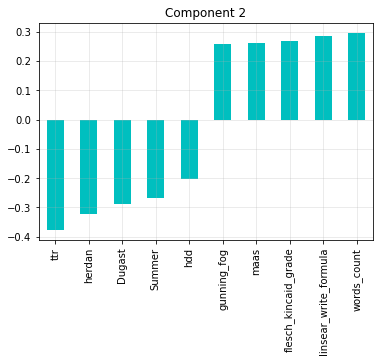

Accumulative explained varaince for Component 2 is 0.3853


ttr                     -0.3782
herdan                  -0.3237
Dugast                  -0.2874
Summer                  -0.2691
hdd                     -0.2030
gunning_fog              0.2590
maas                     0.2605
flesch_kincaid_grade     0.2680
linsear_write_formula    0.2852
words_count              0.2961
Name: Dimension 2, dtype: float64

In [92]:
pca_plot(pca_results_25, 2)

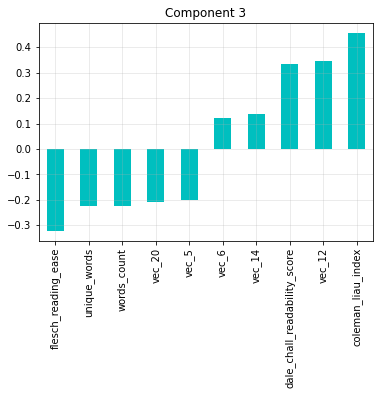

Accumulative explained varaince for Component 3 is 0.4313


flesch_reading_ease            -0.3209
unique_words                   -0.2250
words_count                    -0.2237
vec_20                         -0.2068
vec_5                          -0.1999
vec_6                           0.1231
vec_14                          0.1363
dale_chall_readability_score    0.3345
vec_12                          0.3458
coleman_liau_index              0.4562
Name: Dimension 3, dtype: float64

In [93]:
pca_plot(pca_results_25, 3)

In [94]:
#train test split
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(pca_features_25, y, test_size=0.20, random_state=123)

In [95]:
classifier_pca = xgb.XGBClassifier(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

classifier_pca.fit(X_train_pca, Y_train_pca)

/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:27:41] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [96]:
y_pred_pca = classifier_pca.predict(X_test_pca)

counter = collections.Counter(y_pred_pca)
counter

Counter({4: 4916, 3: 3574, 2: 4173})

In [97]:
# predictions_pca = [round(value) for value in y_pred_pca]

In [98]:
# evaluate predictions
accuracy = accuracy_score(Y_test_pca, y_pred_pca)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 45.44%


In [99]:
train_score = classification_report(Y_test_pca, y_pred_pca)
print(train_score)

              precision    recall  f1-score   support

           2       0.50      0.49      0.49      4212
           3       0.41      0.35      0.38      4197
           4       0.45      0.52      0.48      4254

    accuracy                           0.45     12663
   macro avg       0.45      0.45      0.45     12663
weighted avg       0.45      0.45      0.45     12663



In [100]:
mean_squared_error(Y_test_pca, y_pred_pca)

1.0364842454394694

## Cross validation

In [101]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(classifier_pca, pca_features_25, y, cv=kf)

[12:27:49] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:27:57] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:28:05] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:28:13] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:28:21] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [102]:
for fold, score in enumerate(scores):
    print(f'Fold {fold+1}: {score:.3f}')

# Print the overall accuracy
print(f'Overall Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

Fold 1: 0.447
Fold 2: 0.449
Fold 3: 0.447
Fold 4: 0.448
Fold 5: 0.459
Overall Accuracy: 0.450 (+/- 0.009)


In [103]:
pca_results_25 = pca_results(X, pca_25)
pca_results_25

,Explained Variance,time_stamp,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,...,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
Dimension 1,0.2456,-0.0261,0.2275,-0.2414,-0.2384,-0.0,-0.2504,-0.1752,-0.1949,-0.2259,...,0.0272,-0.0326,0.0071,0.0330,-0.0032,-0.0387,0.0370,0.0442,-0.0947,0.0214
Dimension 2,0.1397,0.1066,-0.1848,0.2680,0.2590,0.0,0.2500,-0.0069,-0.0881,0.2852,...,-0.0186,-0.0185,-0.0144,0.0136,-0.0059,0.0220,-0.0237,0.0049,-0.0154,0.0106
Dimension 3,0.0460,-0.0410,-0.3209,0.0842,0.0103,-0.0,0.0539,0.4562,0.3345,-0.0156,...,-0.1122,0.3458,0.0102,0.1363,0.0550,0.0584,-0.1555,-0.0951,-0.0089,-0.2068
Dimension 4,0.0355,0.0019,-0.0300,-0.0000,-0.0055,0.0,0.0087,0.0826,-0.0160,-0.0018,...,0.1834,0.1756,-0.3719,-0.2718,0.0359,-0.2333,0.0621,-0.1423,0.2310,-0.0500
Dimension 5,0.0335,0.0322,0.0067,-0.0136,-0.0177,0.0,-0.0079,0.0159,0.0426,-0.0210,...,-0.0846,0.1650,-0.0166,-0.0851,0.0033,0.3389,-0.2818,0.0740,0.2973,-0.0746
Dimension 6,0.0320,0.3983,-0.0340,0.0087,-0.0050,0.0,-0.0240,-0.0277,0.1031,-0.0135,...,-0.1203,-0.1132,0.1030,0.1357,0.0512,0.3986,-0.0362,0.4483,0.1317,-0.0635
Dimension 7,0.0311,0.0400,0.0263,-0.0251,-0.0322,0.0,0.0037,0.0508,0.0159,-0.0284,...,-0.0224,0.2263,0.1925,-0.1953,0.2961,0.0175,0.2054,-0.2452,0.1551,0.1736
Dimension 8,0.0311,-0.0770,0.0112,-0.0235,-0.0203,0.0,-0.0022,0.0616,-0.1164,-0.0174,...,0.3266,-0.0803,-0.2403,-0.0463,0.6343,0.0104,-0.0455,0.1717,0.3308,-0.0033
Dimension 9,0.0292,-0.1822,0.0070,-0.0068,-0.0160,-0.0,0.0002,0.0134,-0.0016,-0.0071,...,-0.2151,0.2195,0.1704,-0.1632,0.0808,-0.1628,0.0179,0.3086,0.0845,0.3323
Dimension 10,0.0283,0.1348,0.0633,0.0078,0.0482,-0.0,-0.0149,-0.1966,0.0479,0.0412,...,-0.3001,-0.2582,-0.0366,0.0938,0.4088,-0.2776,-0.1805,-0.0787,-0.0637,-0.4991
